# **Introduction**

In this lab, we are dealing with a dataset about wholesale customers. We are going to be using an unsuperivsed learning approach to cluster the data samples from different customers to ultimately later use them for creating customer profiles of similar customers who the business can target from a marketing point of view. We will be using k-Means clustering and Agglomerative Clustering to cluster our different data samples. Furthermore, we will also do an evaluation measure for the clustering results for each cluster. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

# **Data**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/INET 4061/Lab9/Wholesale customers data.csv") # Importing Data.
data.head() # Displaying data we imported

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We received our dataset from the following source: [Source 1](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv)

# **Exploratory Data Analysis**

In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


All of the features seem to be on different scales so we would probably need to scale the data if we are using multple features in our clustering proccess. The Channel and Region seem to be categorical variables. The rest of the variables other than Channel or Region seem to be numerical. The categorical variables have different magnitudes in comparision to the other variables so we have stadardize all the features.

In [ ]:
data.isnull().values.any()

False

The output of the code cell above shows us that there are no null/missing values in our dataset.

In [ ]:
data1=data
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


# **Models**

### **KMeans Clustering**

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Inertia')

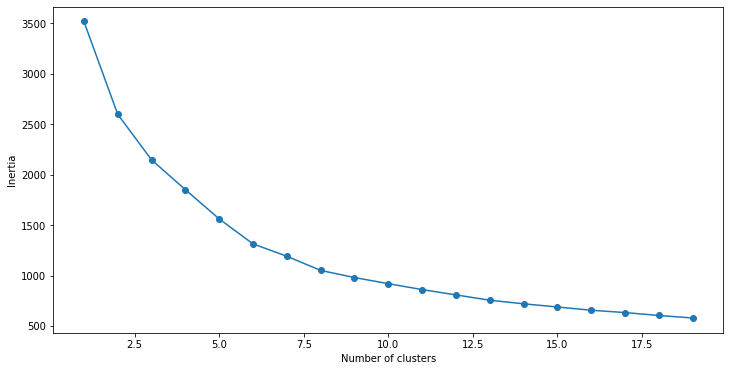

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The elbow of this graph of Interia vs Number Of clusters is around at 5. So it is reasinable to choose the number of clusters ot be equal to 5 for our clustering.

In [ ]:

# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()


1    207
0    126
3     91
2     10
4      6
Name: cluster, dtype: int64

According to the number of items printed for each cluster, cluster 1 seems to have the most number of samples while cluster 4 seems to have the least.

In [ ]:
frame.head()

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0


In [ ]:
variables=['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicassen']
data_scaled_2=frame = pd.DataFrame(data_scaled)
data_scaled_2.head()
data['Channel']

count=2
for i in variables:
  data_scaled_2[i]=data_scaled_2[count]
  count+=1

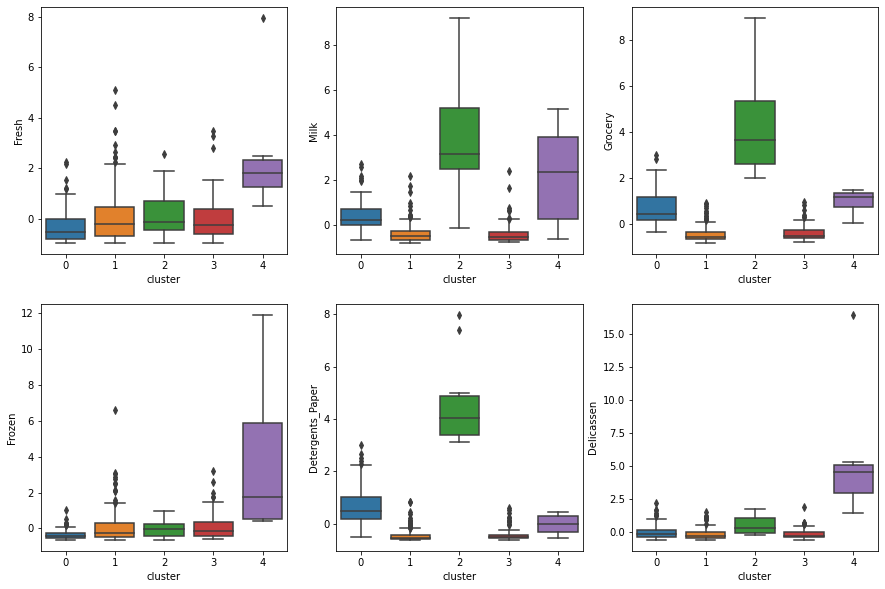

In [ ]:

data_scaled_2['cluster']=kmeans.labels_
fig, ax=plt.subplots(2,3,figsize=(15,10))
for var, subplot in zip(variables, ax.flatten()):
  sns.boxplot(x='cluster', y=var, data=data_scaled_2, ax=subplot)

The visualization output above is giving us an understanding about the amount annual spending for each of the numerical variables. For example, the Frozen vs cluster boxplots show that the amount of spending for frozen beverages was higher in cluster 4 than any other cluster.

Cluster 2 seems to have high spending in Milk, Detergents_Paper, and Frozen on average. Cluster 4 seems to have relatively high spending compared ot other clusters in Mulk, Delicassen, Fresh, and Frozen variables. Cluster 3 and Cluster 2 seem to have very low spending on every variable except for Fresh.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.37323337301762427
For n_clusters = 3 The average silhouette_score is : 0.3567685389017652
For n_clusters = 4 The average silhouette_score is : 0.36831361173098737
For n_clusters = 5 The average silhouette_score is : 0.34285654296309154
For n_clusters = 6 The average silhouette_score is : 0.35882504056214026


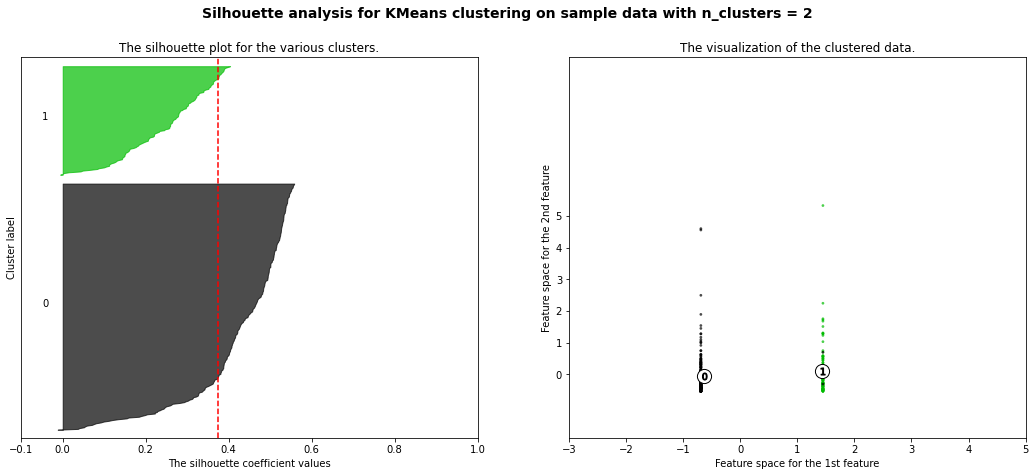

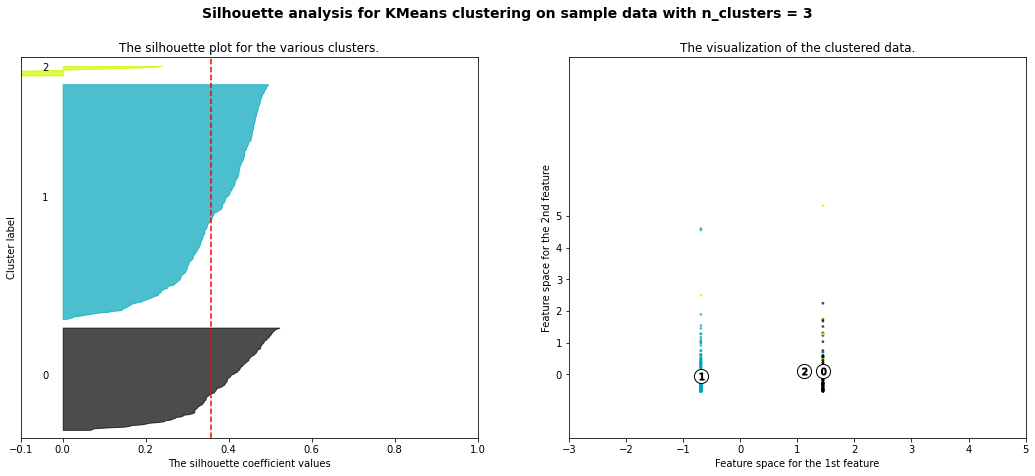

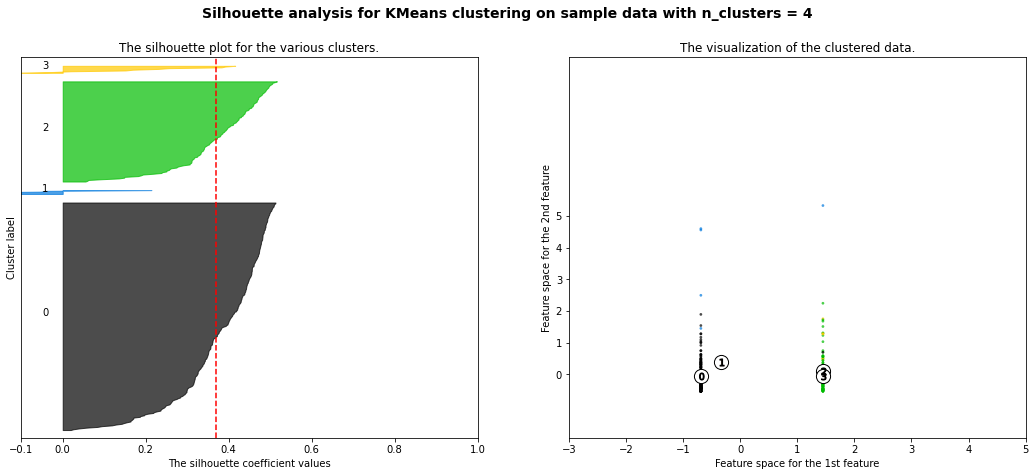

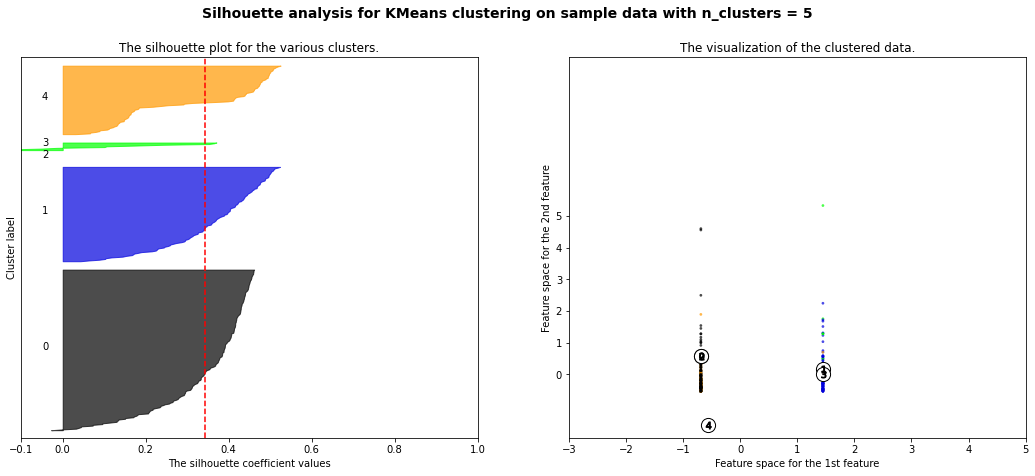

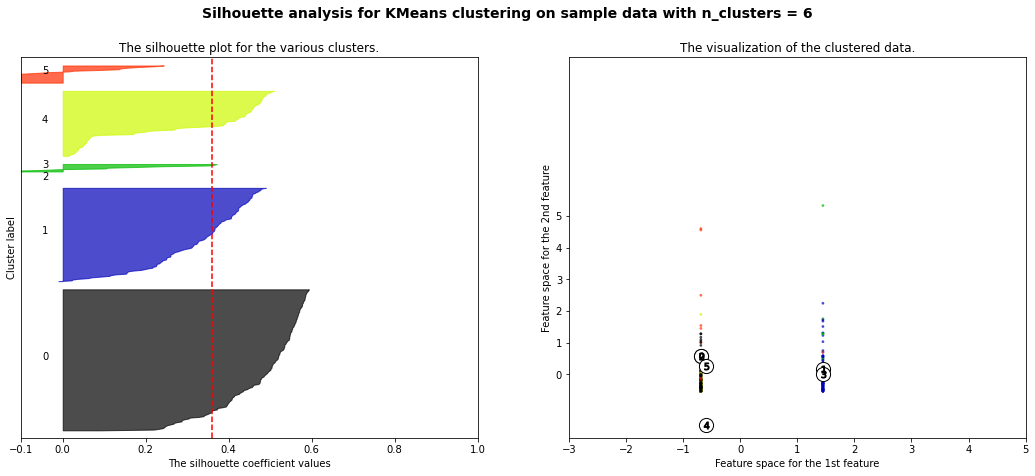

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
X=data_scaled
y=pred

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    arr=[]
    for ii in range(0,50000,1000):
      arr.append(ii)
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 7], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax2.set_yticks([0,1,2,3,4,5])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    ax2.axis([-3.0,5,-2,10])

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The Silhouette ANaylsis above shows that cluster 3 and cluseter 5 have extremly small distances sperating them from other clusters for n_clusters=6. The n_clusters=5 shows us that cluster 3 seems to have very low distance to the other clusters as the coefficient values of cluseter three is below 0.4. 

### **Agglomerative Clustering**

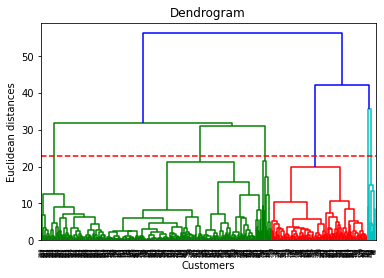

In [ ]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X=data_scaled_2

#3 Using the dendrogram to find the optimal numbers of clusters. 
# First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do #hierarchical clustering and building dendrograms. Only import the #needed tool.
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=23, color='r', linestyle='--')
plt.show()

Based upon the dendogram above, I thought that 5 clusters would still be the ideal choice for the number of clusters to later use in the Agglomerative Clustering. The Euucldian distance doesn't decrease much below 23 where the red dotted line. The increase in the amount of difference between each cluster will start decreasing as starting dding more clusters past 5. 

In [ ]:
#4 Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc=hc.fit_predict(X)
data_scaled_2['cluster']=y_hc
data_scaled_2['cluster'].value_counts()


0    217
2    126
4     86
1     10
3      1
Name: cluster, dtype: int64

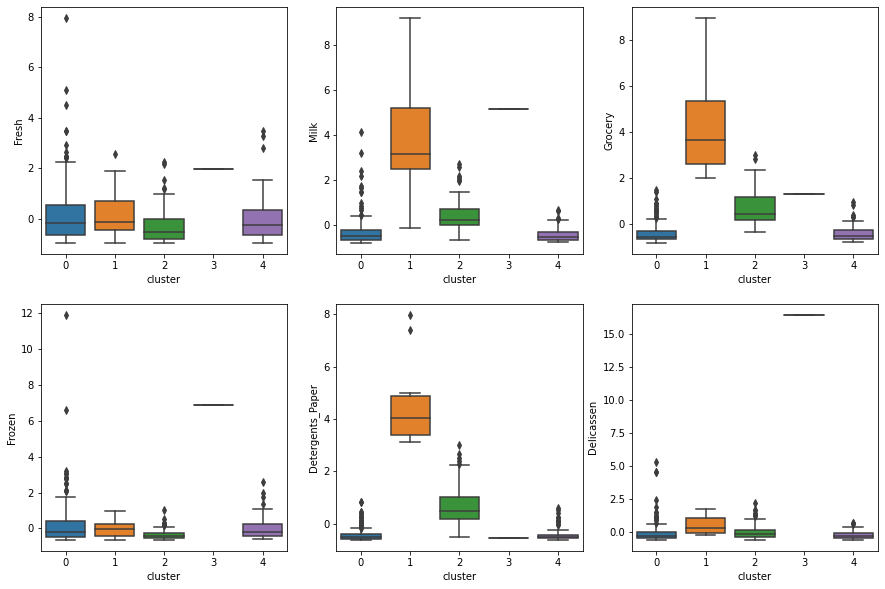

In [ ]:

data_scaled_2['cluster']=hc.labels_
fig, ax=plt.subplots(2,3,figsize=(15,10))
for var, subplot in zip(variables, ax.flatten()):
  sns.boxplot(x='cluster', y=var, data=data_scaled_2, ax=subplot)

According to the visualization above, cluster number 3 seems to have almost no datapoints for all the different variables. For thee Milk variable, cluster one seems to contain a good spread of spending samples. Cluster 1 in genral seems to have aa higher spending for Grocery, Delicassen, and Detergent Paper in comparesion to other clusters. However, all the 5 clusters seem to not be able to cluster the annual spending samples of Fresh correctly because there seem to be a lot of outlouts for every cluster.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.37323337301762427
For n_clusters = 3 The average silhouette_score is : 0.3567685389017652
For n_clusters = 4 The average silhouette_score is : 0.36831361173098737
For n_clusters = 5 The average silhouette_score is : 0.34285654296309154
For n_clusters = 6 The average silhouette_score is : 0.35882504056214026


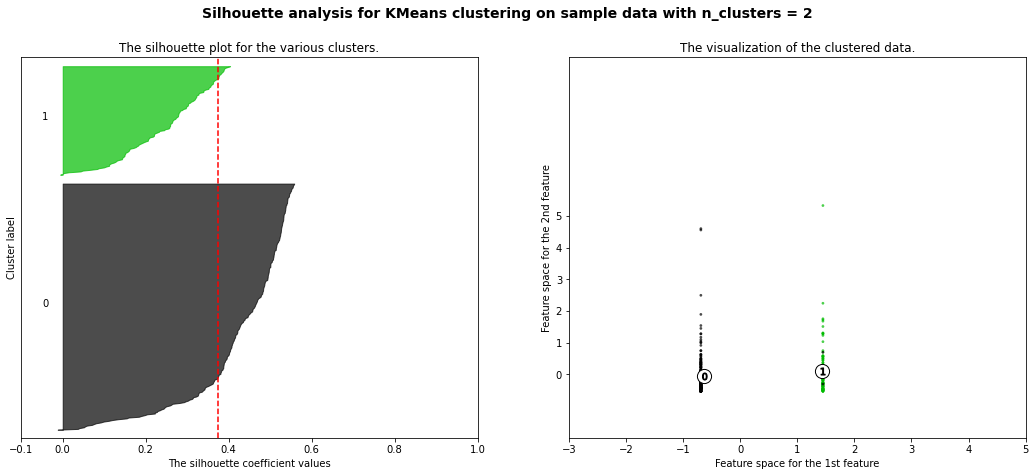

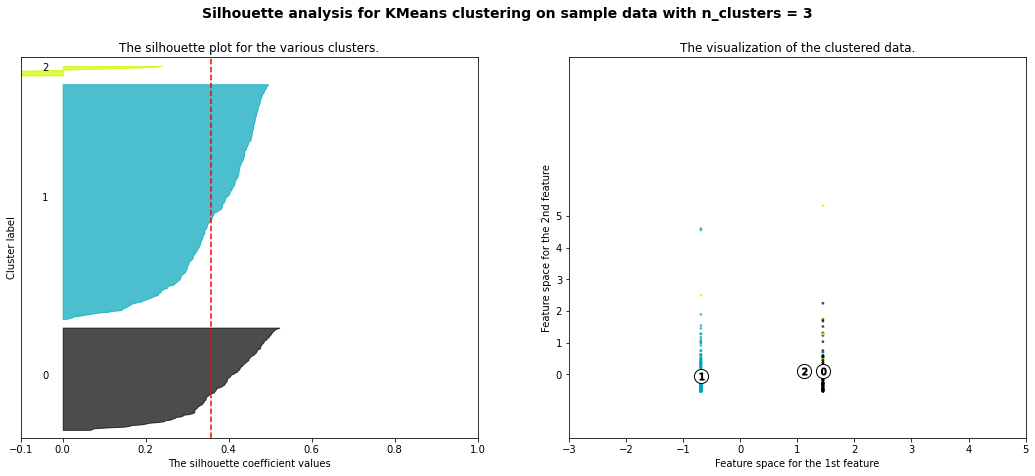

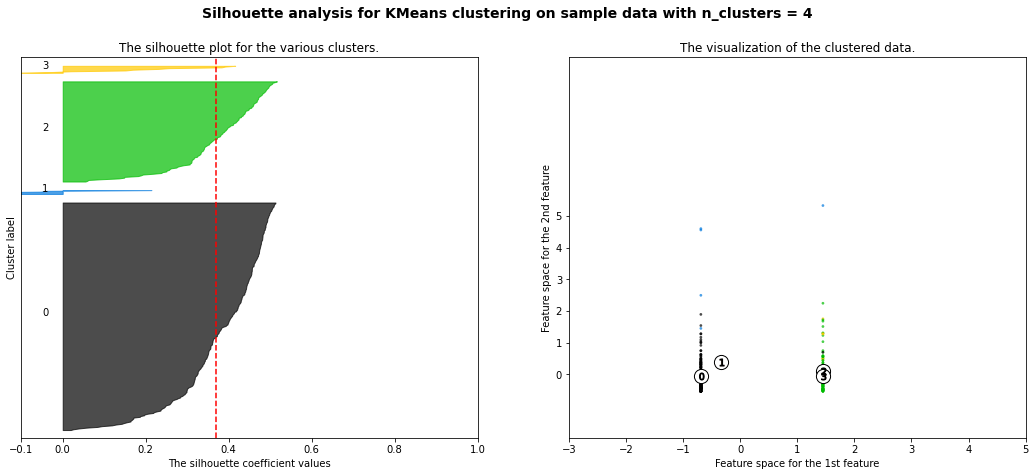

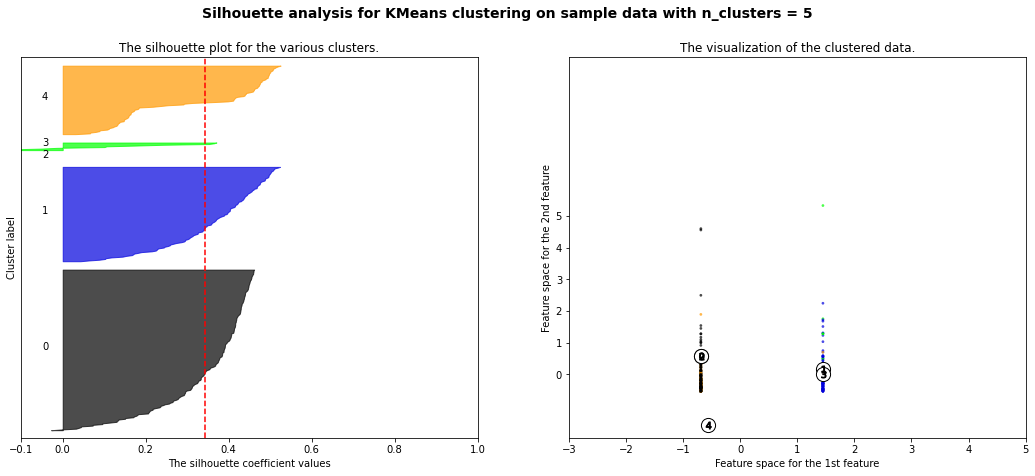

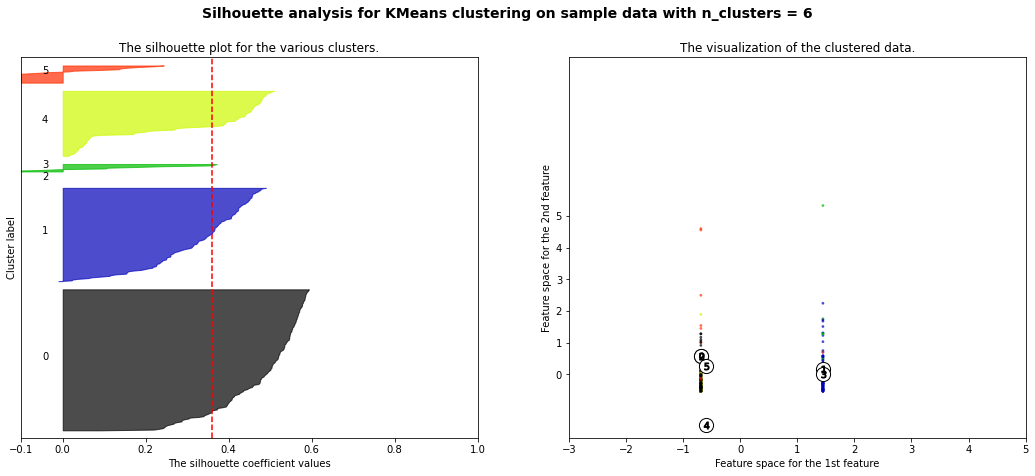

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
X=data_scaled
y=y_hc

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    arr=[]
    for ii in range(0,50000,1000):
      arr.append(ii)
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 7], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax2.set_yticks([0,1,2,3,4,5])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    ax2.axis([-3.0,5,-2,10])

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The average Silhouette scores are all very low in general for alll the clusters as they are around 0.3 and 0.4. The ideal number of n_clusters from the analysis seems to be around 4 or 5 because most of the clusters seem to have coefficients that are higher than the average score in those clusters.

# **Conclusion**

In our lab, we did both kMeans clustering and Agglomerative Clustering. We then did an outut of our results for each cluster in graphs of boxplots for each variable(feature) in the data. The evaluation we did for both KMeans and Agglomerative returned very low silhouett analysis scores of about 0.37 on average so that made me think that the clusters we made are not as different for this reason because the average silhouette scores were low(closer to 0 than 1). A possible reason why this might have happened is due to the way we standardized our data. Out of the 8 different variables, 6 of the variables were numerical while only 2 of them were categorical(Channel and Region). All the numerical variables were on the same scale as they were about the annual spending for each variable. The standardization greatly affected the 6 numerical variables by reducing their scales from a range of 112,000 to about range of 10. 

Nevertheless,  as we look at our results from KMeans clustering(visualization: Graphs of Boxplots), we see that cluster 4 seems to have datasamples(people) where the annual spending on Milk, Delicassen, and Frozen was higher in comparasion to data samples from other clusters. Cluster 2 seems to have high spending on Milk, Grocery, Detergents_Paper in comparisons to data samples from the other clusters. For the Fresh variable, the clustering was not done properly because all the clusters seem to have relatively similar data points similar data ranges.

From the results from agglomerative clustering, Cluster 1 seems to have data samples where the annual spending on Milk, Grocery, and Detergests_paper is higher than the other clusters based upon the visualization of the results in box plots. In terms of the visualization of the results in terms of box plots, the rest of the clusters seem to have on average the same type of data samples. 

Overall, I don think the both clustering models did a great job of making clusters which had a were significantly different from other clusters. A pattern that was found from our clustering was that one of the clusters(Cluster 2 from KMeans clustering and cluster 1 from agglomerative clustering) seem to have a group of customers who had a higher annual spending on Milk,Grocery, and detergents_paper. The evaluation measures used in our lab gave us very low silhouette average scores alll the differen number of clusters and they indicated that the clusters were not very different from each other because the silhouette analysis scores were around 0.3-0.4 on average.